In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler

%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv('files/x_train.csv', sep=';')
y_train = pd.read_csv('files/y_train.csv', sep=';', header=None)

In [3]:
X_train['maxPlayerLevel'].describe()

count    25289.000000
mean        18.424888
std         20.172964
min          0.000000
25%          4.000000
50%         11.000000
75%         27.000000
max        146.000000
Name: maxPlayerLevel, dtype: float64

In [4]:
y_train.head(10).values.shape

(10, 1)

In [5]:
y_train.describe()

,0
count,25289.000000
mean,0.288189
std,0.452928
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
pipe = make_pipeline(StandardScaler())

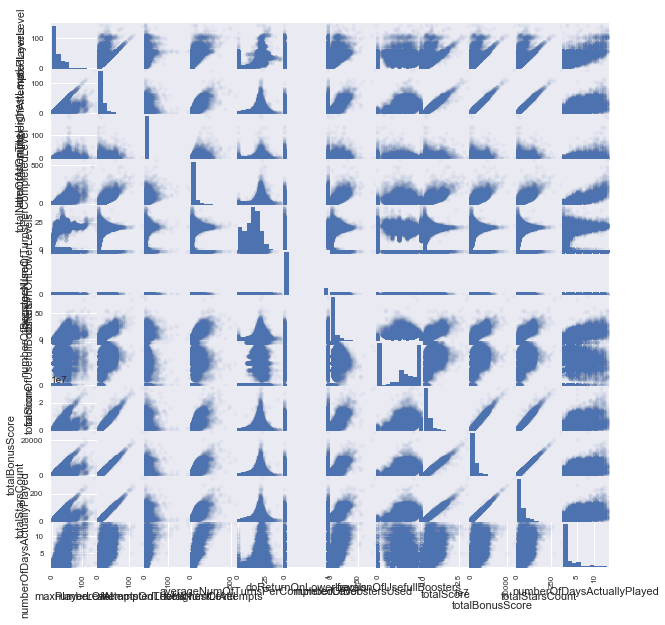

In [7]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(X_train, alpha=0.05, figsize=(10, 10));

In [8]:
X_train.corr()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
maxPlayerLevel,1.000000,0.616157,0.472142,0.757854,0.683706,0.368297,0.675955,0.126235,0.570234,0.551366,0.579593,0.793385
numberOfAttemptedLevels,0.616157,1.000000,0.300797,0.836398,0.531197,0.290636,0.881915,0.332887,0.979954,0.989014,0.993779,0.663450
attemptsOnTheHighestLevel,0.472142,0.300797,1.000000,0.532032,0.277072,0.197035,0.389465,-0.041700,0.277326,0.264804,0.281343,0.524109
totalNumOfAttempts,0.757854,0.836398,0.532032,1.000000,0.509510,0.391969,0.836706,0.128843,0.798051,0.795570,0.808989,0.846448
averageNumOfTurnsPerCompletedLevel,0.683706,0.531197,0.277072,0.509510,1.000000,0.250261,0.543847,0.457168,0.499681,0.489411,0.514770,0.555594
doReturnOnLowerLevels,0.368297,0.290636,0.197035,0.391969,0.250261,1.000000,0.320439,0.071646,0.310218,0.271397,0.288803,0.383024
numberOfBoostersUsed,0.675955,0.881915,0.389465,0.836706,0.543847,0.320439,1.000000,0.203519,0.854263,0.851824,0.862254,0.751712
fractionOfUsefullBoosters,0.126235,0.332887,-0.041700,0.128843,0.457168,0.071646,0.203519,1.000000,0.328287,0.358474,0.358219,0.058929
totalScore,0.570234,0.979954,0.277326,0.798051,0.499681,0.310218,0.854263,0.328287,1.000000,0.985111,0.986423,0.617847
totalBonusScore,0.551366,0.989014,0.264804,0.795570,0.489411,0.271397,0.851824,0.358474,0.985111,1.000000,0.997357,0.606864


In [ ]:
col1 = 'maxPlayerLevel'
col2 = 'numberOfDaysActuallyPlayed'

plt.figure(figsize=(10, 6))

plt.scatter(X_train[col1][X_train['class'] == '+'],
            X_train[col2][X_train['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(daX_trainta[col1][X_train['class'] == '-'],
            X_train[col2][X_train['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

In [9]:
import xgboost as xgb

xgbclf = xgb.XGBClassifier(t)
X_train_trans = pipe.fit_transform(X_train)
y_train_trans = y_train[0].values


/Users/ponkin/Development/kaggle/bike_sharing/notebook/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
from sklearn.metrics import log_loss
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_trans, y_train_trans, test_size=0.5, random_state=17)

space = {
        'max_depth': hp.choice('max_depth', np.arange(3, 10, dtype=int)),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.7, 1),
         'n_estimators': hp.choice('x_n_estimators', np.arange(800, 10000, dtype=int)),
         'learning_rate': hp.uniform ('x_learning_rate', 0.001, 0.1)
    }

def objective(space):

    clf = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                            learning_rate=space['learning_rate'],
                            max_depth = space['max_depth'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'])

    eval_set  = [( X_train1, y_train1), ( X_test1, y_test1)]

    clf.fit(X_train1, y_train1,
            eval_set=eval_set,
            eval_metric="logloss", 
            early_stopping_rounds=50)

    pred = clf.predict_proba(X_test1)[:,1]
    auc = log_loss(y_test1, pred)
    print("SCORE: %0.7f" % auc)
    return {'loss':auc, 'status': STATUS_OK }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

[283]	validation_0-logloss:0.372293	validation_1-logloss:0.4032
[284]	validation_0-logloss:0.371989	validation_1-logloss:0.402995
[285]	validation_0-logloss:0.371697	validation_1-logloss:0.40279
[286]	validation_0-logloss:0.371389	validation_1-logloss:0.402599
[287]	validation_0-logloss:0.3711	validation_1-logloss:0.402406
[288]	validation_0-logloss:0.370809	validation_1-logloss:0.402213
[289]	validation_0-logloss:0.370528	validation_1-logloss:0.402029
[290]	validation_0-logloss:0.370257	validation_1-logloss:0.401846
[291]	validation_0-logloss:0.37	validation_1-logloss:0.401671
[292]	validation_0-logloss:0.369696	validation_1-logloss:0.401513
[293]	validation_0-logloss:0.369434	validation_1-logloss:0.401325
[294]	validation_0-logloss:0.369165	validation_1-logloss:0.401141
[295]	validation_0-logloss:0.368896	validation_1-logloss:0.400961
[296]	validation_0-logloss:0.368627	validation_1-logloss:0.400777
[297]	validation_0-logloss:0.368371	validation_1-logloss:0.400606
[298]	validation_0-